# Preparativos

## Importacion de librerias

In [18]:
#Importando librerias
import pandas as pd
import csv
import matplotlib.pyplot as plt

## Importacion de Archivos

In [5]:
# Funcion para leer la ruta de los archivos
def obtener_pacientes(ruta_archivo):
    df = pd.read_csv(ruta_archivo)
    pacientes = df['Paciente']
    return pacientes.drop_duplicates().tolist()
# Variables de las rutas de los Archivos
ruta_sanos = "D:/Documents/Python/Enfermedades analisis/Grupo_1/Pacientes_sanos.csv"
ruta_enfermos = "D:/Documents/Python/Enfermedades analisis/Grupo_2/Pacientes_enfermos.csv"
# Variables de los pacientes
df_sanos = obtener_pacientes(ruta_sanos)
df_enfermos = obtener_pacientes(ruta_enfermos)
# Imprsion en consola de las listas de los pacientes
print("Pacientes sanos:", df_sanos)
print("Pacientes enfermos:", df_enfermos)


Pacientes sanos: ['Paciente 1', 'Paciente 2', 'Paciente 3', 'Paciente 4', 'Paciente 5']
Pacientes enfermos: ['Paciente1', 'Paciente2', 'Paciente3', 'Paciente4', 'Paciente5']


## Creación del archivo CSV

In [17]:
# Estandarizar los nombres de los pacientes eliminando espacios
df_sanos['Paciente'] = df_sanos['Paciente'].str.replace(' ', '')
df_enfermos['Paciente'] = df_enfermos['Paciente'].str.replace(' ', '')

# Añadir una columna "Grupo" para distinguir entre pacientes sanos y enfermos
df_sanos['Grupo'] = 'Sano'
df_enfermos['Grupo'] = 'Enfermo'

# Fusionar los DataFrames
df_fusionado = pd.concat([df_sanos, df_enfermos]).drop_duplicates().reset_index(drop=True)

# Nombre del archivo CSV
nombre_archivo = "D:/Documents/Python/Enfermedades analisis/Pacientes_fusionados.csv"

# Columnas adicionales que podrían estar presentes en los datos
columnas_adicionales = ['Tiempos de interlatido']

# Crear y escribir datos en el archivo CSV
with open(nombre_archivo, mode='w', newline='', encoding='utf-8') as archivo:
    escritor = csv.writer(archivo)
    # Escribir el encabezado
    encabezado = ["Paciente", "Grupo"] + columnas_adicionales
    escritor.writerow(encabezado)
    # Escribir los datos
    for index, row in df_fusionado.iterrows():
        escritor.writerow([row['Paciente'], row['Grupo'], row['Tiempos de interlatido']])

print(f"Archivo {nombre_archivo} creado exitosamente.")

Archivo D:/Documents/Python/Enfermedades analisis/Pacientes_fusionados.csv creado exitosamente.


## Comparación


Estadísticas descriptivas de tiempos de interlatido cardiaco (segundos):
Pacientes sanos:
count    144609.000000
mean          0.730194
std           0.128712
min           0.391000
25%           0.641000
50%           0.719000
75%           0.789000
max           5.039000
Name: Tiempos de interlatido, dtype: float64

Pacientes enfermos:
count    139283.000000
mean          0.755142
std           0.130594
min           0.488000
25%           0.644000
50%           0.748000
75%           0.868000
max           1.844000
Name: Tiempos de interlatido, dtype: float64


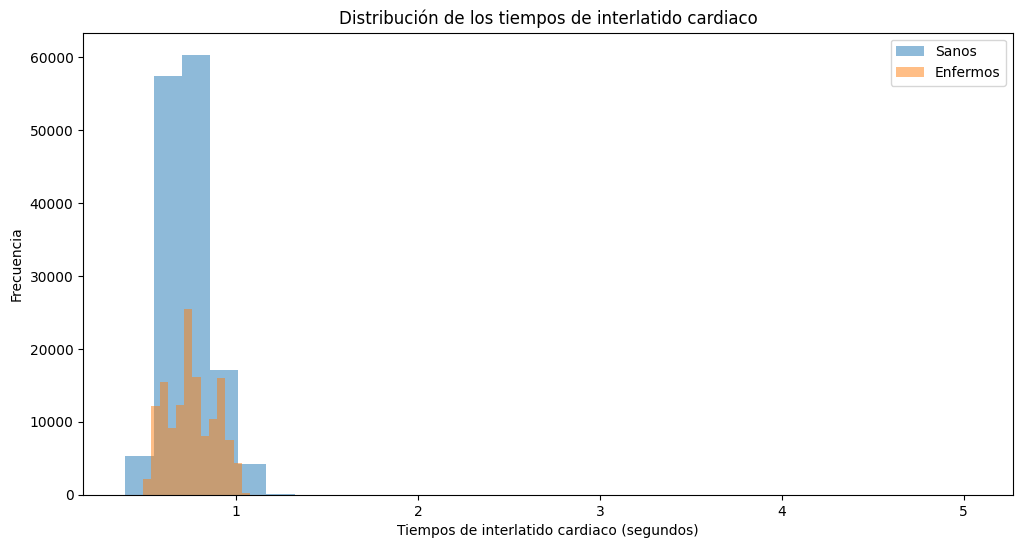

In [19]:
# Comparación de los tiempos de interlatido cardiaco
# Separar los datos de sanos y enfermos
tiempos_sanos = df_sanos['Tiempos de interlatido']
tiempos_enfermos = df_enfermos['Tiempos de interlatido']

# Estadísticas descriptivas
estadisticas_sanos = tiempos_sanos.describe()
estadisticas_enfermos = tiempos_enfermos.describe()

print("\nEstadísticas descriptivas de tiempos de interlatido cardiaco (segundos):")
print("Pacientes sanos:")
print(estadisticas_sanos)
print("\nPacientes enfermos:")
print(estadisticas_enfermos)

# Visualización de los datos
plt.figure(figsize=(12, 6))

# Histograma de tiempos de interlatido cardiaco para pacientes sanos
plt.hist(tiempos_sanos, bins=30, alpha=0.5, label='Sanos')

# Histograma de tiempos de interlatido cardiaco para pacientes enfermos
plt.hist(tiempos_enfermos, bins=30, alpha=0.5, label='Enfermos')

plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los tiempos de interlatido cardiaco')
plt.legend()
plt.show()

# Medidas de tendencia central

## Media

Media de los tiempos de interlatido cardiaco (segundos):
Pacientes sanos: 0.7301939160079941
Pacientes enfermos: 0.7551424653403501


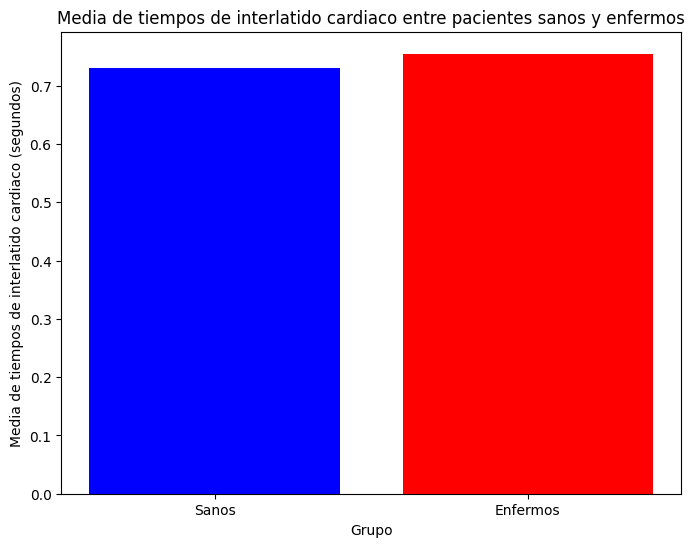

In [21]:
# Media
# Calcular la media de los tiempos de interlatido cardiaco
media_sanos = df_sanos['Tiempos de interlatido'].mean()
media_enfermos = df_enfermos['Tiempos de interlatido'].mean()

# Imprimir las medias
print("Media de los tiempos de interlatido cardiaco (segundos):")
print("Pacientes sanos:", media_sanos)
print("Pacientes enfermos:", media_enfermos)

# Graficar las medias
labels = ['Sanos', 'Enfermos']
medias = [media_sanos, media_enfermos]

plt.figure(figsize=(8, 6))
plt.bar(labels, medias, color=['blue', 'red'])
plt.xlabel('Grupo')
plt.ylabel('Media de tiempos de interlatido cardiaco (segundos)')
plt.title('Media de tiempos de interlatido cardiaco entre pacientes sanos y enfermos')
plt.show()

## Mediana

In [ ]:
# Calcular la mediana de los tiempos de interlatido cardiaco
mediana_sanos = df_sanos['Tiempos de interlatido'].median()
mediana_enfermos = df_enfermos['Tiempos de interlatido'].median()

# Imprimir las medianas
print("Mediana de los tiempos de interlatido cardiaco (segundos):")
print("Pacientes sanos:", mediana_sanos)
print("Pacientes enfermos:", mediana_enfermos)

# Graficar las medianas
labels = ['Sanos', 'Enfermos']
medianas = [mediana_sanos, mediana_enfermos]

plt.figure(figsize=(8, 6))
plt.bar(labels, medianas, color=['blue', 'red'])
plt.xlabel('Grupo')
plt.ylabel('Mediana de tiempos de interlatido cardiaco (segundos)')
plt.title('Mediana de tiempos de interlatido cardiaco entre pacientes sanos y enfermos')
plt.show()

## Varianza

Varianza de los tiempos de interlatido cardiaco (segundos):
Pacientes sanos: 0.016566857989926582
Pacientes enfermos: 0.01705481317083508


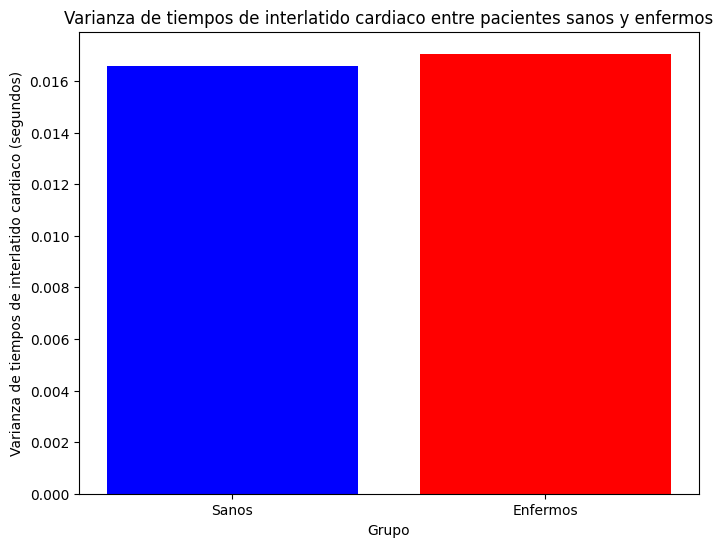

In [22]:
# Calcular la varianza de los tiempos de interlatido cardiaco
varianza_sanos = df_sanos['Tiempos de interlatido'].var()
varianza_enfermos = df_enfermos['Tiempos de interlatido'].var()

# Imprimir las varianzas
print("Varianza de los tiempos de interlatido cardiaco (segundos):")
print("Pacientes sanos:", varianza_sanos)
print("Pacientes enfermos:", varianza_enfermos)

# Graficar las varianzas
labels = ['Sanos', 'Enfermos']
varianzas = [varianza_sanos, varianza_enfermos]

plt.figure(figsize=(8, 6))
plt.bar(labels, varianzas, color=['blue', 'red'])
plt.xlabel('Grupo')
plt.ylabel('Varianza de tiempos de interlatido cardiaco (segundos)')
plt.title('Varianza de tiempos de interlatido cardiaco entre pacientes sanos y enfermos')
plt.show()

## Desviación estándar

## Moda